In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [196]:
df = pd.read_csv('retail_price.csv')
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [197]:
df['month_year'] = pd.to_datetime(df['month_year']).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [198]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


👉 **Overall:** The dataset is relatively clean, the wide ranges in price and demand are driven by product diversity rather than errors. Outliers (high‑priced or high‑demand items) are likely valid and valuable for insights, so I’ll retain them. Where skewness exists (unit price, demand), I may apply log transformation for modeling, but they don't need to be removed. The next step will be visualizing trends across demand, pricing, and seasonality to confirm these initial observations.

# 📊Exploratory Analysis

### 🎯Demand

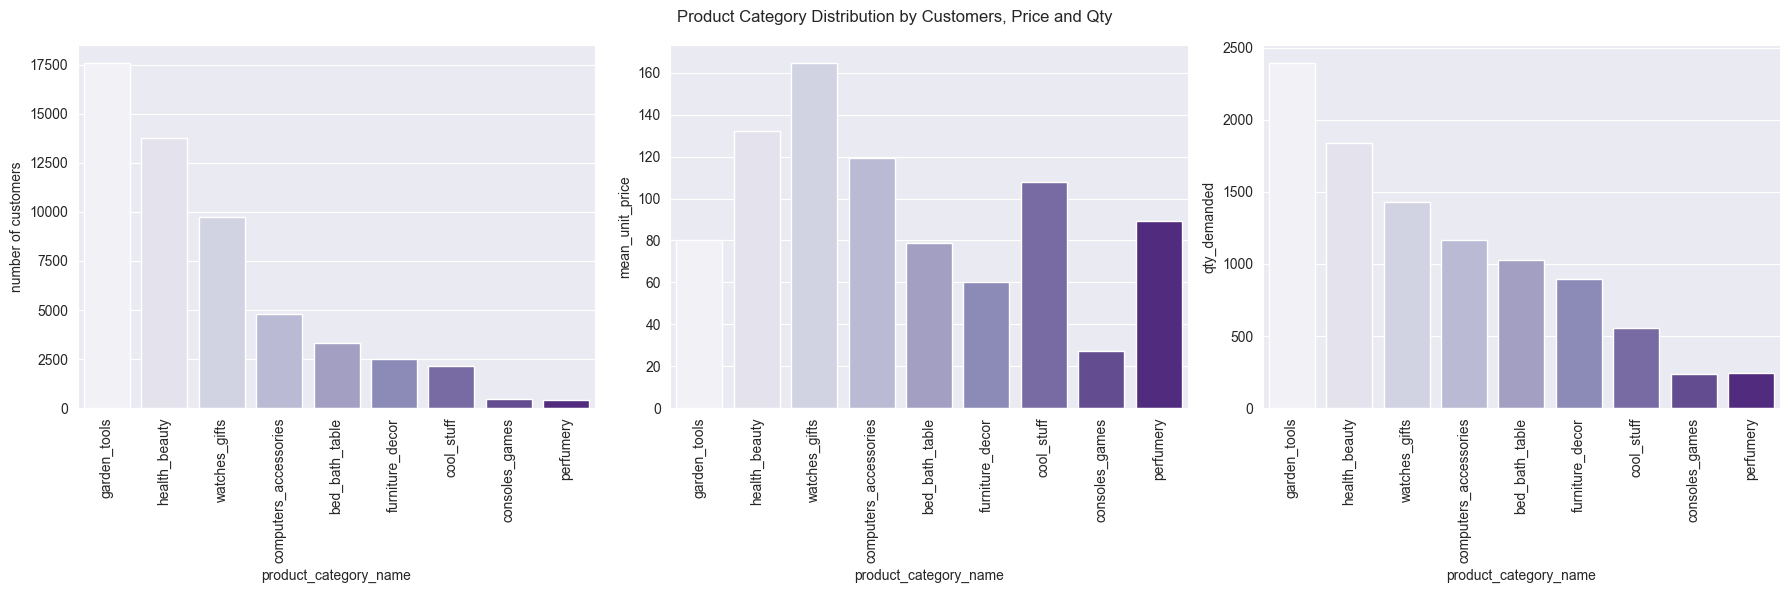

In [199]:
prod_category_df = df.groupby('product_category_name').agg({'customers':'sum', 'unit_price': 'mean', 'qty': 'sum'}).sort_values(by='customers', ascending=False).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['customers', 'unit_price', 'qty']):
    sns.barplot(prod_category_df, x='product_category_name', y=col, ax=axes[i], palette="Purples")
    axes[i].set_ylabel(['number of customers', 'mean_unit_price', 'qty_demanded'][i])
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Product Category Distribution by Customers, Price and Qty')
plt.tight_layout()
plt.show()

Demand and revenue are concentrated in a few key product categories like `garden_tools` and `health_beauty`, showing signs of category imbalance. Some categories ( like `watches_gifts`) are priced higher but generate fewer sales, implying they are premium or niche. <br>
These category-level distinctions will be critical when evaluating price elasticity, since what counts as “outlier pricing” in one category may be “normal” in another.

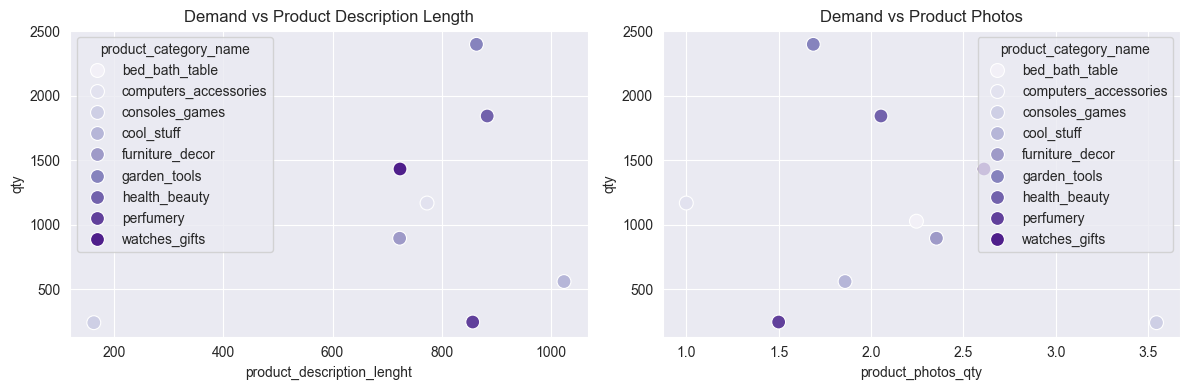

In [200]:
# Aggregate correctly
demand_by_attr = df.groupby('product_category_name').agg({
    'product_description_lenght':'mean',
    'product_photos_qty':'mean',
    'qty': 'sum'
}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter: description length vs demand
sns.scatterplot(data=demand_by_attr, x='product_description_lenght', y='qty',
                hue='product_category_name', ax=axes[0], palette="Purples", s=100)
axes[0].set_title("Demand vs Product Description Length")

# Scatter: photos qty vs demand
sns.scatterplot(data=demand_by_attr, x='product_photos_qty', y='qty',
                hue='product_category_name', ax=axes[1], palette="Purples", s=100)
axes[1].set_title("Demand vs Product Photos")

plt.tight_layout()
plt.show()


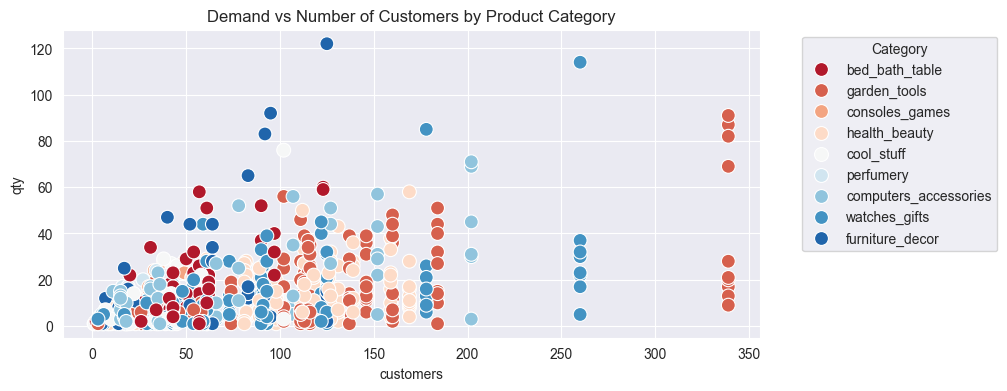

In [201]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='customers', y='qty', data=df, hue='product_category_name', palette='RdBu', s=100)
plt.title('Demand vs Number of Customers by Product Category')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


From this plot it shows that demand growth is primarily customer-driven, but purchasing behavior differs by product type.<br> Some product categories attract many customers but low unit purchases per customer, while others rely on fewer customers who buy in bulk. <br>This indicates that both customer acquisition and frequency of purchase play different roles across categories

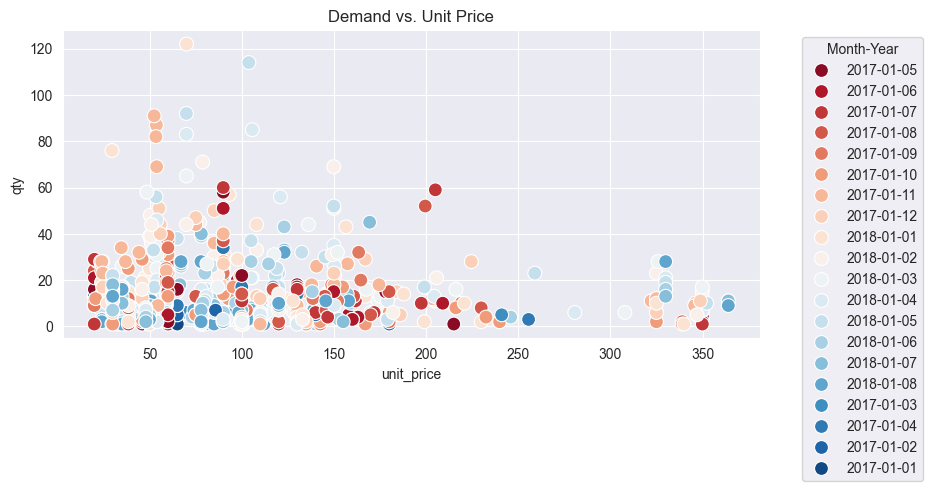

In [202]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x='unit_price', y='qty', hue='month_year', palette='RdBu', s=100)
plt.title('Demand vs. Unit Price')
plt.legend(title='Month-Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

lower-priced products tend to generate significantly higher demand, while higher-priced products are niche and show limited quantity sold.<br> This initial scatter suggests clear price sensitivity at scale. <br>
 further elasticity modeling will clarify the thresholds where demand drops sharply with price increases

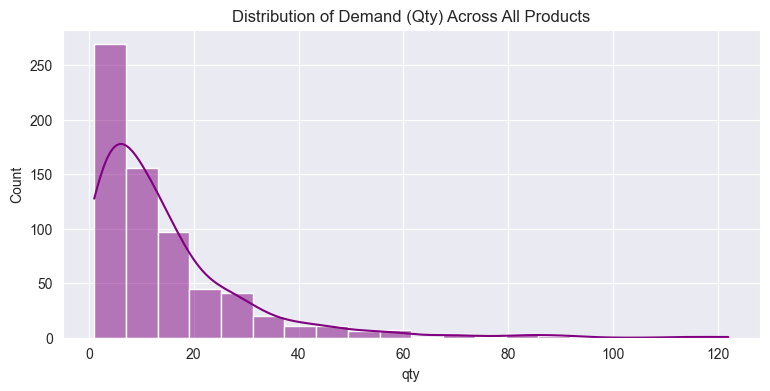

In [203]:
plt.figure(figsize=(9,4))
sns.histplot(df['qty'], bins=20, kde=True, color='purple')
plt.title('Distribution of Demand (Qty) Across All Products')
plt.show()

The distribution plot shows that the demand for the products is heavily right-skewed . This means majority of products sell in small quantities, while a small number of products sell in very large quantities. <br> This is a common pattern in retail data and is not inherently "bad," but it can cause problems for statistical models that assume a more normal distribution.

### 🎯Revenue

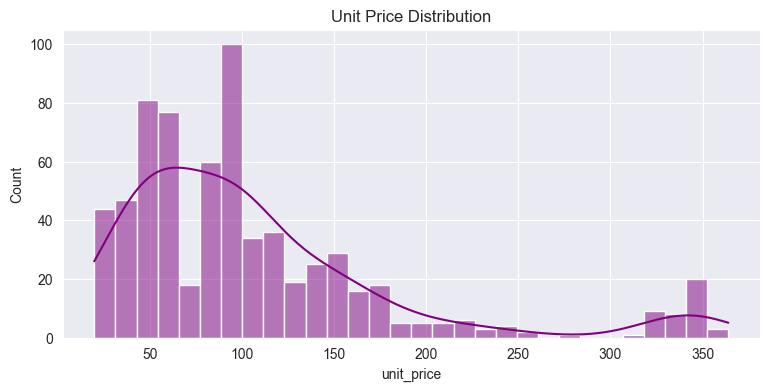

In [204]:
plt.figure(figsize=(9,4))
sns.histplot(df['unit_price'], bins=30, kde=True, color='purple')
plt.title('Unit Price Distribution')
plt.show()

The majority of products fall in the `40–150` price band, confirming that most of the company’s offerings are positioned in the budget-to-mid market range.<br>
Higher prices (`> $200`) are outliers but appear to be legitimate premium categories, not data errors. This shows product diversity rather than anomalies, and also suggests a needed log transformation for modeling

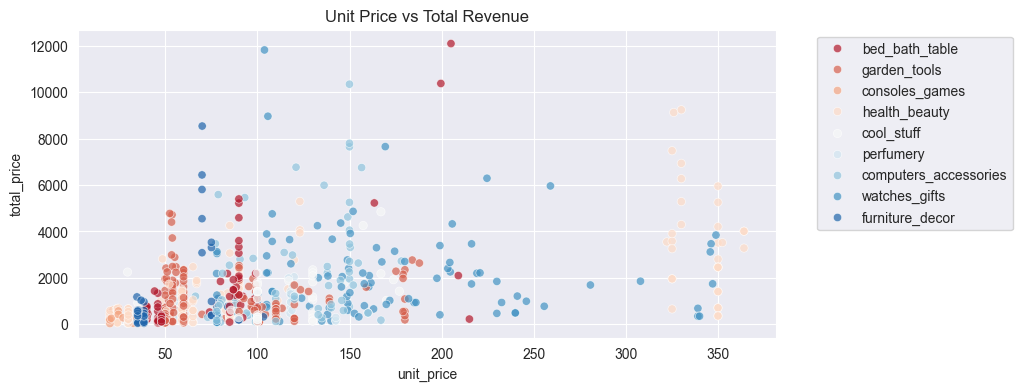

In [205]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='unit_price', y='total_price', data=df, hue='product_category_name', palette='RdBu', alpha=0.7)
plt.title('Unit Price vs Total Revenue')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

The plot shows that revenue is maximized for mid‑tier price products (`80–120`), showing strong demand with reasonable unit price.<br>
 Products in the premium range ('> 250) contribute marginal revenue despite their high price,reinforcing evidence of price sensitivity.
 > From a pricing strategy perspective,the sweet spot for maximizing revenue appears to be `80–120`, while luxury items remain low-volume niche products that may serve branding rather than revenue growth.

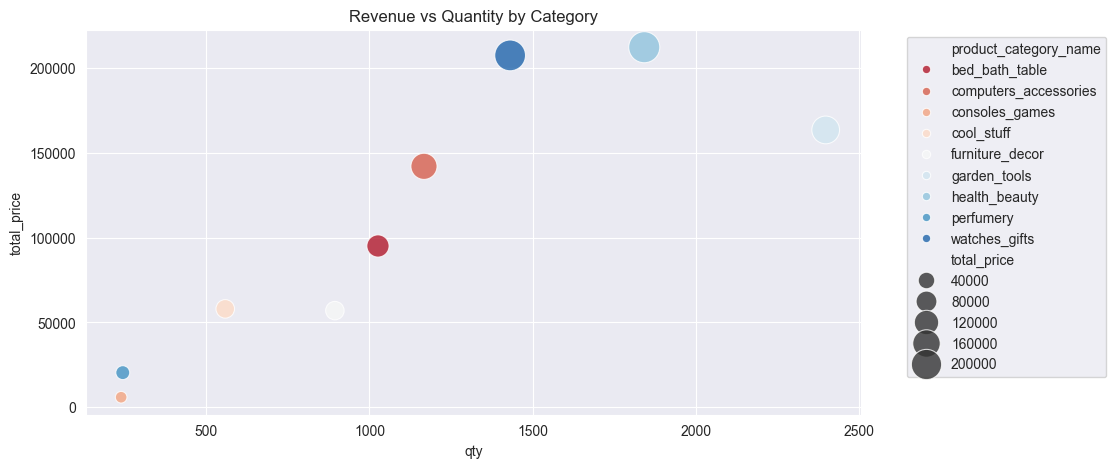

In [206]:
plt.figure(figsize=(10,5))
revenue_df = df.groupby('product_category_name').agg({'qty':'sum', 'total_price':'sum'}).reset_index()
sns.scatterplot(x='qty', y='total_price', size='total_price', hue='product_category_name',
                data=revenue_df, palette='RdBu', sizes=(70, 500), alpha=0.8)
plt.title('Revenue vs Quantity by Category')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Revenue is largely volume-driven: categories with the most units sold (`watches & gifts`, `health` `beauty`) dominate total revenue. However, `compuer accessories`  deliver solid revenue even at low volumes, leveraging higher unit prices, while categories like `perfumery` and `consoles_games` remain small contributors overall.
> This reinforces that different strategies are required: volume categories benefit from efficiency and retention, while niche/premium categories lean on pricing power

### 🎯Competitor Benchmarking

Let's compute relative price vs comp rating
<br>Relative price = our product’s price – average competitor price

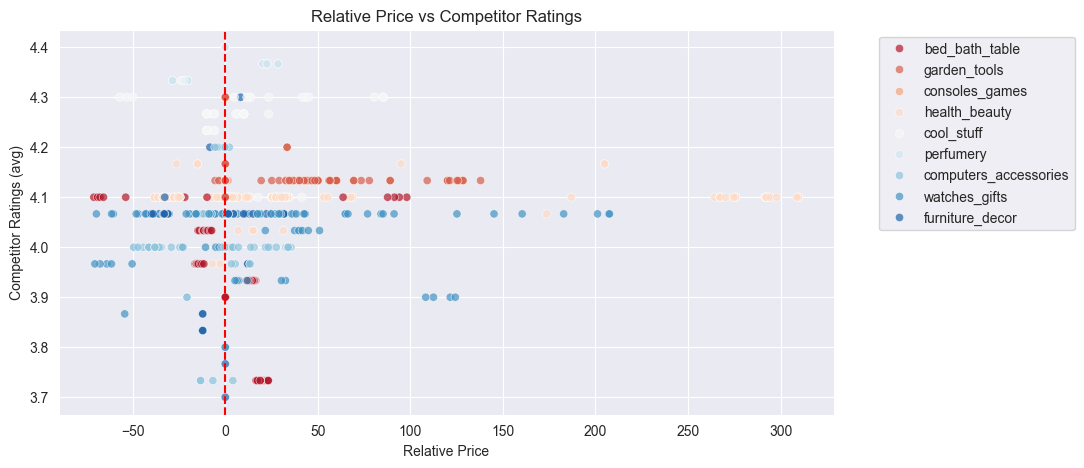

In [207]:
df['comp_avg'] = df[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)

df['relative_price'] = df['unit_price'] - df['comp_avg']

plt.figure(figsize=(10,5))
sns.scatterplot(x='relative_price', y=df[['ps1','ps2','ps3']].mean(axis=1),
                data=df, hue='product_category_name', palette='RdBu', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')  # line at parity pricing
plt.title('Relative Price vs Competitor Ratings')
plt.xlabel('Relative Price')
plt.ylabel('Competitor Ratings (avg)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Most competitor products rated between 4.0–4.2. <br>
Therefore, product differentiation through ratings/quality is minimal – customers mostly see comparable quality.
>This highlights the importance of pricing: when we’re more expensive than competitors, we don’t always have a clear quality advantage to justify the premium. <br> Our strongest relative advantage is when we are cheaper or priced similarly to equally-rated competitors

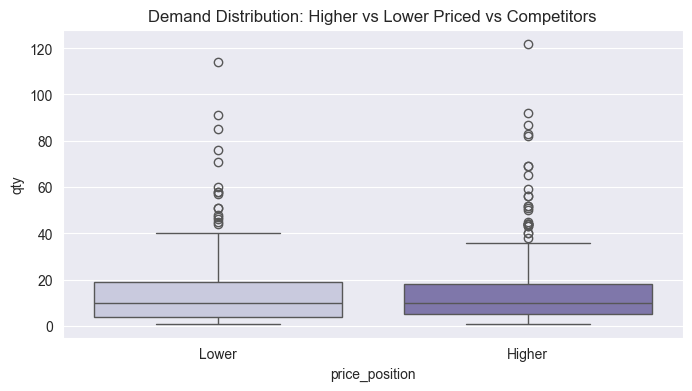

In [208]:
df['price_position'] = df['relative_price'].apply(lambda x: 'Higher' if x > 0 else 'Lower')

plt.figure(figsize=(8,4))
sns.boxplot(x='price_position', y='qty', data=df, palette='Purples')
plt.title('Demand Distribution: Higher vs Lower Priced vs Competitors')
plt.show()

Demand tends to be stronger when products are priced lower relative to competitors. <br>
Companies occasionally achieve strong demand even at higher pricing, but these are exceptions rather than the rule.<br>
This suggests customers are price-sensitive when choosing between similarly-rated products and reinforces the importance of competitive pricing strategies to capture volume

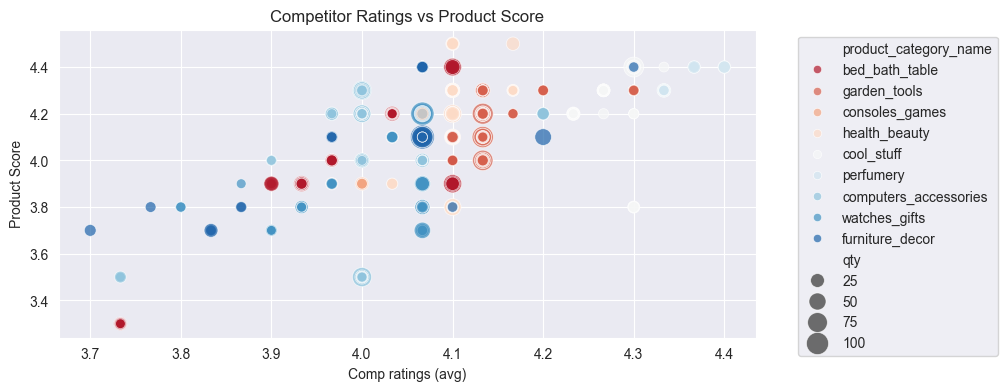

In [209]:
plt.figure(figsize=(9,4))
sns.scatterplot(x=df[['ps1','ps2','ps3']].mean(axis=1),
                y='product_score', size='qty', data=df,
                hue='product_category_name', palette='RdBu', sizes=(50,300), alpha=0.7)
plt.title('Competitor Ratings vs Product Score')
plt.xlabel('Comp ratings (avg)')
plt.ylabel('Product Score')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Our product ratings and competitors' ratings are very similar, meaning customers see them as comparable in quality, *clustered around 3.9+*
<br>In this competitive environment, highest-demand products are those with ratings equal to or better than the competition.<br>
Conversely, products with lower ratings rarely achieve significant sales.
<br> **This shows that even a strong pricing strategy can't overcome a perceived lack of quality, reinforcing maintainance or exceeding competitors' quality to drive sustained demand.**

### 🎯Seasonality and Time trends

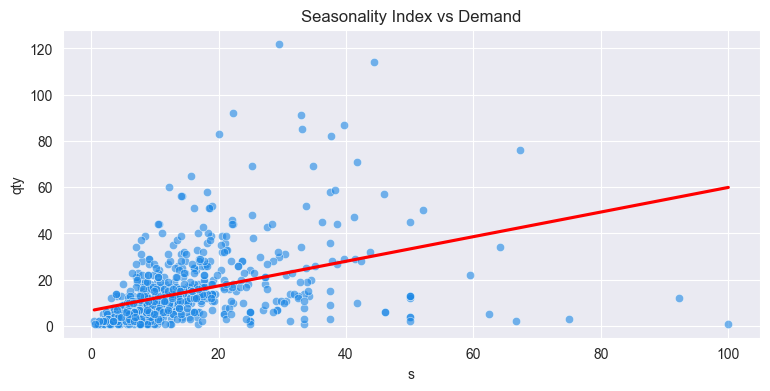

In [210]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x="s", y="qty", alpha=0.6, color="#1E88E5")
sns.regplot(data=df, x="s", y="qty", scatter=False, color="red", ci=None)  # add trendline
plt.title("Seasonality Index vs Demand")
plt.show()

In [211]:
print("Correlation between seasonality index and demand:", df["s"].corr(df["qty"]))

Correlation between seasonality index and demand: 0.41100126112230007


The seasonality index (s) loosely correlates with demand, higher demand months tend to have higher seasonality scores, though the relationship is not linear. <br>This confirms that while seasonality contributes to demand patterns, it’s not the only driver — pricing and competition still dominate

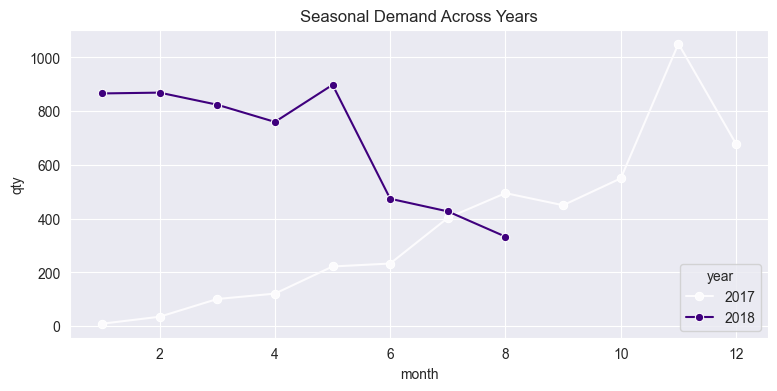

In [212]:
df_month = df.groupby(['year','month']).agg({'qty':'sum','total_price':'sum'}).reset_index()

plt.figure(figsize=(9,4))
sns.lineplot(data=df_month, x="month", y="qty", hue="year", marker="o", palette="Purples")
plt.title("Seasonal Demand Across Years")
plt.show()


Comparing across years, consistent seasonal peaks emerge in year‑end months (Nov–Dec). The late‑2018 spike especially reinforces cyclicality tied to holidays. <br>Any forecasting model should capture both the upward growth trend and recurring seasonality

### 🎯Freight against Weight

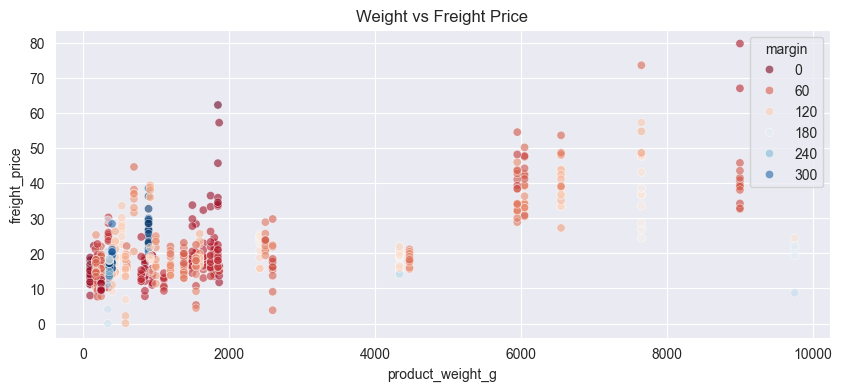

In [213]:
# Add margin column
df["margin"] = df["unit_price"] - df["freight_price"]

plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="product_weight_g", y="freight_price", alpha=0.6, hue='margin', palette="RdBu")
plt.title("Weight vs Freight Price")
plt.show()

`Freight` costs scale with product `weight`, with a clear stepwise pattern suggesting shipment brackets `(e.g., 0–2kg, 2–5kg)`. <br>
Heavier items (>`6000g`) typically face disproportionately high freight prices `(30–80)`, which erode margins and competitiveness. <br>
*However, some outliers exist: very heavy products (~9000g) are linked to surprisingly low freight costs `(9–25)`*. These anomalies may reflect
- data entry issues,
- flat-rate shipping, or
- special cost structures, <br>
rather than true economic patterns.
> For modeling, these values would be flagged as potential anomalies and either validated against business rules or treated cautiously to avoid biasing results.

In [214]:
df[(df['product_weight_g'] > 8000) & (df['freight_price'] < 30)]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps2,fp2,comp_3,ps3,fp3,lag_price,comp_avg,relative_price,price_position,margin
671,bed5,bed_bath_table,2017-01-05,1,215.00,8.760000,215.000000,56,162,5,...,4.4,8.760000,45.95,4.0,15.100000,214.950000,116.950000,98.050000,Higher,206.240000
672,bed5,bed_bath_table,2017-01-06,10,2090.00,21.322000,209.000000,56,162,5,...,4.4,21.322000,45.95,4.0,12.933333,215.000000,114.950000,94.050000,Higher,187.678000
673,bed5,bed_bath_table,2017-01-07,59,12095.00,22.195932,205.000000,56,162,5,...,4.4,22.195932,45.95,4.0,14.840000,209.000000,113.616667,91.383333,Higher,182.804068
674,bed5,bed_bath_table,2017-01-08,52,10375.00,19.412885,199.509804,56,162,5,...,4.4,19.412885,45.95,4.0,14.287500,205.000000,111.786601,87.723203,Higher,180.096919
675,bed5,bed_bath_table,2017-01-09,32,5222.36,24.324687,163.398710,56,162,5,...,4.4,24.324687,45.95,4.0,15.100000,199.509804,99.749570,63.649140,Higher,139.074022


`Freight vs Weight` generally shows a stepwise relationship, consistent with bracketed shipping costs, but exceptions exist. For example, `bed_bath_table` items `(~9.7kg)` incur unusually low freight costs `($9–$25)`. <br> These represent valid shipping arrangements (flat-rate contracts, bulk category rules, or packaging quirks) rather than true anomalies. I will keep them in the dataset but note their special nature in interpretation. Such cases highlight that freight is not a pure function of weight — category-level shipping policies matter

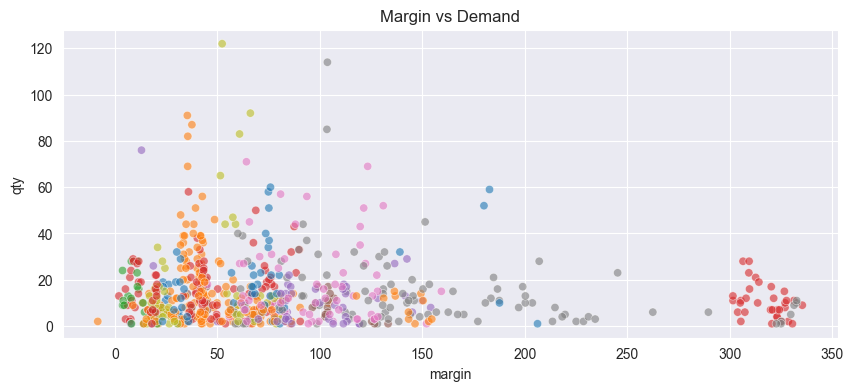

In [215]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="margin", y="qty", alpha=0.6, hue="product_category_name", legend=False)
plt.title("Margin vs Demand")
plt.show()

`Demand` is inversely correlated with `margin` at extremes: very high-margin items `(>250)` show weak demand, while lower-to-mid margin ranges see the bulk of demand. This reflects **price sensitivity:**<br>
     most customers purchase more when margins (and thus prices) are moderate.
     <br> However, there are **outliers** *(medium margin products with very high demand)* where category positioning likely supports both volume and profitability.

    This suggests optimization opportunities around the `20–80` margin band, balancing both demand and profitability.

### 🎯CORR Analysis

In [216]:
# Choose relevant numeric columns
le = LabelEncoder()
df["product_category_encoded"] = le.fit_transform(df["product_category_name"])
df['freight_price_avg'] = df[["fp1", 'fp2', 'fp3']].mean(axis=1)
df['ps_avg'] = df[['ps1','ps2','ps3']].mean(axis=1)
corr_vars = [
   "product_category_encoded", "qty", "unit_price", 'lag_price', "freight_price", 'volume', 'product_weight_g',
    "customers", "product_score",'comp_avg','freight_price_avg', 's','weekend', 'weekday', 'holiday', 'month', 'year', 'product_photos_qty', 'product_description_lenght', 'product_name_lenght','ps_avg',  "total_price"
]

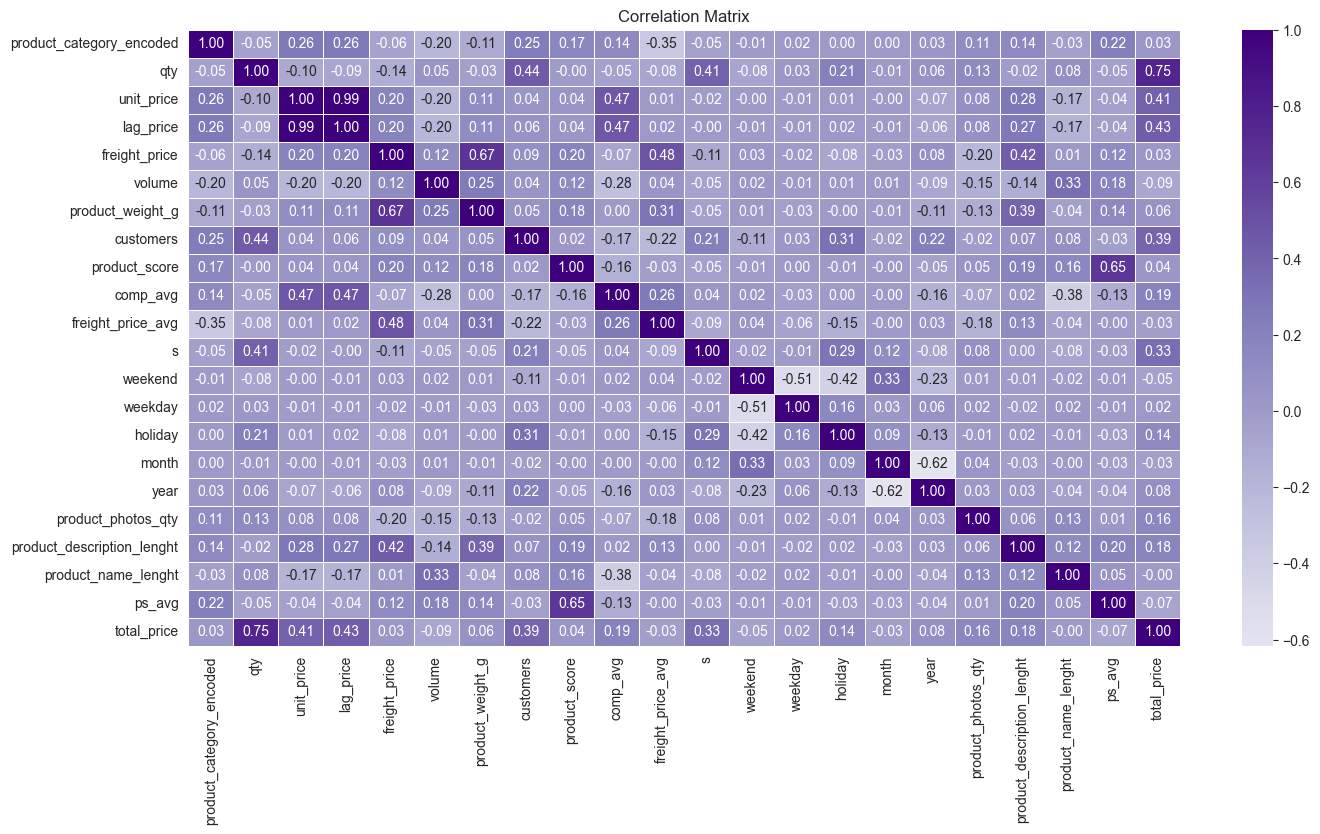

In [217]:
corr = df[corr_vars].corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# ⚙️ Feature Engineering

### Drop colums

In [218]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'comp_avg', 'relative_price',
       'price_position', 'margin', 'product_category_encoded',
       'freight_price_avg', 'ps_avg'],
      dtype='object')

In [224]:
new_df = df.drop(columns=['product_id', 'month_year', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'weekday', 'weekend', 'month',
       'year', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'product_category_encoded', 'price_position', 'margin',])
new_df.columns

Index(['product_category_name', 'qty', 'total_price', 'freight_price',
       'unit_price', 'product_weight_g', 'product_score', 'customers',
       'holiday', 's', 'volume', 'comp_avg', 'relative_price',
       'freight_price_avg', 'ps_avg'],
      dtype='object')

In [226]:
new_df['relative_rating'] = new_df['product_score'] - new_df['ps_avg']
new_df['rev_per_cust'] = new_df['total_price'] / new_df['customers']
new_df['units_per_cust'] = new_df['qty'] / new_df['customers']
new_df['freight_per_kg'] = new_df['freight_price'] / new_df['product_weight_g']
new_df

,product_category_name,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,holiday,s,volume,comp_avg,relative_price,freight_price_avg,ps_avg,relative_rating,rev_per_cust,units_per_cust,freight_per_kg
0,bed_bath_table,1,45.95,15.100000,45.950000,350,4.0,57,1,10.267394,3800,116.950000,-71.000000,12.957299,4.1,-0.1,0.806140,0.017544,0.043143
1,bed_bath_table,3,137.85,12.933333,45.950000,350,4.0,61,1,6.503115,3800,114.950000,-69.000000,16.341516,4.1,-0.1,2.259836,0.049180,0.036952
2,bed_bath_table,6,275.70,14.840000,45.950000,350,4.0,123,1,12.071651,3800,113.616667,-67.666667,17.009922,4.1,-0.1,2.241463,0.048780,0.042400
3,bed_bath_table,4,183.80,14.287500,45.950000,350,4.0,90,1,9.293873,3800,111.786601,-65.836601,16.119047,4.1,-0.1,2.042222,0.044444,0.040821
4,bed_bath_table,2,91.90,15.100000,45.950000,350,4.0,54,1,5.555556,3800,99.749570,-53.799570,19.400403,4.1,-0.1,1.701852,0.037037,0.043143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed_bath_table,1,215.00,8.760000,215.000000,9750,4.4,57,1,0.649351,12600,116.950000,98.050000,12.957299,4.1,0.3,3.771930,0.017544,0.000898
672,bed_bath_table,10,2090.00,21.322000,209.000000,9750,4.4,61,1,6.493506,12600,114.950000,94.050000,16.341516,4.1,0.3,34.262295,0.163934,0.002187
673,bed_bath_table,59,12095.00,22.195932,205.000000,9750,4.4,123,1,38.311688,12600,113.616667,91.383333,17.009922,4.1,0.3,98.333333,0.479675,0.002277
674,bed_bath_table,52,10375.00,19.412885,199.509804,9750,4.4,90,1,33.766234,12600,111.786601,87.723203,16.119047,4.1,0.3,115.277778,0.577778,0.001991


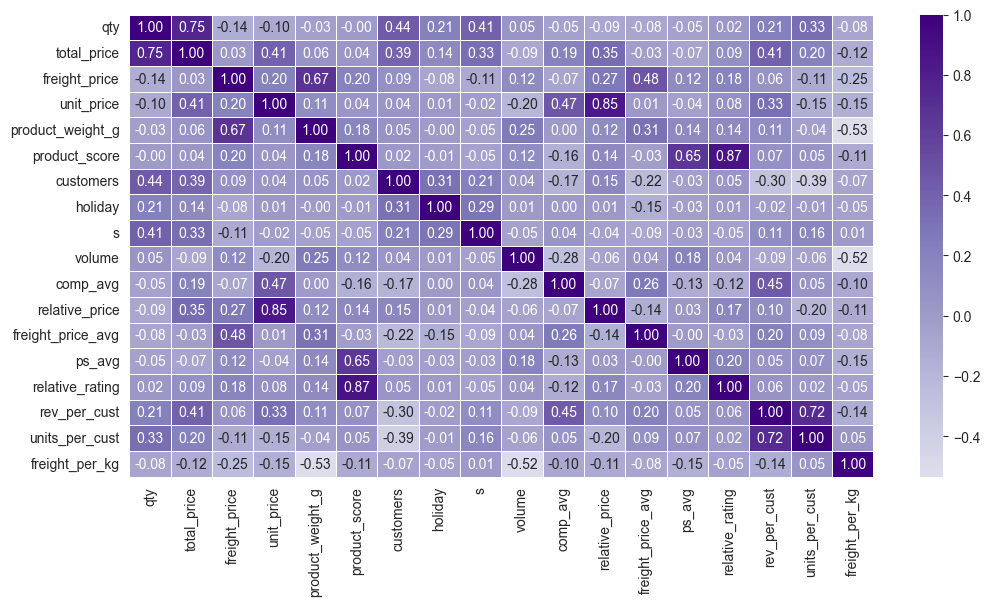

In [230]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_df.select_dtypes(include=np.number).corr(), annot=True, cmap='Purples', fmt='.2f', center=0, linewidths=0.5)
plt.show()